# Zipline Installation: Bundle Ingest & Algorithm Test

## Imports and Settings

We don't need much here since the imports all take place in the cell where we formulate the algorithm.

In [13]:
QuandlKey="E4FTSn8S74TgrxLfE1MD"

In [14]:
QuandlKey

'E4FTSn8S74TgrxLfE1MD'

In [15]:
from zipline.examples import buyapple

## Load Zipline extension

In [16]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


## Ingest Data

In [7]:
! QUANDL_API_KEY=QuandlKey zipline ingest -b quandl

[2021-06-23 04:06:27.900660] INFO: zipline.data.bundles.core: Ingesting quandl.
[2021-06-23 04:06:27.900888] INFO: zipline.data.bundles.quandl: Downloading WIKI metadata.
[2021-06-23 04:06:45.487002] INFO: zipline.data.bundles.quandl: Parsing raw data.
[2021-06-23 04:07:14.374620] INFO: zipline.data.bundles.quandl: Generating asset metadata.
Merging daily equity files:  [---------------------------------#--]  1731/home/satish/anaconda3/envs/ml4t/lib/python3.8/site-packages/zipline/data/bcolz_daily_bars.py:366: UserWarning: Ignoring 1 values because they are out of bounds for uint32:             open  high   low  close        volume  ex_dividend  split_ratio
2011-04-11  1.79  1.84  1.55    1.7  6.674913e+09          0.0          1.0
  winsorise_uint32(raw_data, invalid_data_behavior, "volume", *OHLC)
Merging daily equity files:  [####################################]      
[2021-06-23 04:09:33.687152] INFO: zipline.data.bundles.quandl: Parsing split data.
[2021-06-23 04:09:33.879225] IN

In [17]:
!zipline bundles

csvdir <no ingestions>
quandl 2021-06-23 04:06:27.439189
quandl 2021-06-23 03:54:25.578791
quandl 2021-06-22 06:58:15.969332
quandl 2021-06-22 06:53:15.008844
quandl 2021-06-22 06:49:07.266730
quandl 2021-06-22 06:47:54.667047
quantopian-quandl <no ingestions>


## Run a simple test algorithm

In [19]:
%%zipline --start 2016-1-1 --end 2018-1-1 -o zipline.pickle --no-benchmark

from zipline.api import symbol, order, record

def initialize(context):
    context.asset = symbol('AAPL')

def handle_data(context, data):
    order(context.asset, 10)
    record(AAPL=data.current(context.asset, 'price'))

,period_open,period_close,short_exposure,net_leverage,transactions,ending_value,longs_count,portfolio_value,starting_cash,ending_cash,...,sortino,sharpe,algo_volatility,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algorithm_period_return
2016-01-04 21:00:00+00:00,2016-01-04 14:31:00+00:00,2016-01-04 21:00:00+00:00,0.0,0.000000,[],0.0,0,1.000000e+07,1.000000e+07,1.000000e+07,...,NaN,NaN,NaN,0.000000e+00,0.000000,0.0,0.0,1,2016-01,0.000000e+00
2016-01-05 21:00:00+00:00,2016-01-05 14:31:00+00:00,2016-01-05 21:00:00+00:00,0.0,0.000103,"[{'amount': 10, 'dt': 2016-01-05 21:00:00+00:0...",1027.1,1,9.999999e+06,1.000000e+07,9.998972e+06,...,-11.224972,-11.224972,5.876834e-07,-5.235500e-08,0.000103,0.0,0.0,2,2016-01,-5.235500e-08
2016-01-06 21:00:00+00:00,2016-01-06 14:31:00+00:00,2016-01-06 21:00:00+00:00,0.0,0.000201,"[{'amount': 10, 'dt': 2016-01-06 21:00:00+00:0...",2014.0,1,9.999979e+06,9.998972e+06,9.997965e+06,...,-9.394902,-9.516452,1.865729e-05,-2.113705e-06,0.000201,0.0,0.0,3,2016-01,-2.113705e-06
2016-01-07 21:00:00+00:00,2016-01-07 14:31:00+00:00,2016-01-07 21:00:00+00:00,0.0,0.000289,"[{'amount': 10, 'dt': 2016-01-07 21:00:00+00:0...",2893.5,1,9.999893e+06,9.997965e+06,9.997000e+06,...,-9.623685,-10.479703,6.410160e-05,-1.066293e-05,0.000289,0.0,0.0,4,2016-01,-1.066293e-05
2016-01-08 21:00:00+00:00,2016-01-08 14:31:00+00:00,2016-01-08 21:00:00+00:00,0.0,0.000388,"[{'amount': 10, 'dt': 2016-01-08 21:00:00+00:0...",3878.4,1,9.999908e+06,9.997000e+06,9.996030e+06,...,-7.412520,-7.365239,6.283484e-05,-1.066293e-05,0.000388,0.0,0.0,5,2016-01,-9.182410e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,0.0,0.085132,"[{'amount': 10, 'dt': 2017-12-22 21:00:00+00:0...",871549.8,1,1.023760e+07,9.367805e+06,9.366054e+06,...,2.500854,1.563884,7.601597e-03,-5.682000e-03,0.085132,0.0,0.0,499,2017-12,2.376041e-02
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,0.0,0.083319,"[{'amount': 10, 'dt': 2017-12-26 21:00:00+00:0...",851144.3,1,1.021549e+07,9.366054e+06,9.364348e+06,...,2.159343,1.389702,7.753935e-03,-5.682000e-03,0.085132,0.0,0.0,500,2017-12,2.154920e-02
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,0.0,0.083499,"[{'amount': 10, 'dt': 2017-12-27 21:00:00+00:0...",853000.0,1,1.021564e+07,9.364348e+06,9.362641e+06,...,2.158657,1.389258,7.746203e-03,-5.682000e-03,0.085132,0.0,0.0,501,2017-12,2.156408e-02
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,0.0,0.083882,"[{'amount': 10, 'dt': 2017-12-28 21:00:00+00:0...",857110.8,1,1.021804e+07,9.362641e+06,9.360929e+06,...,2.180178,1.402894,7.739666e-03,-5.682000e-03,0.085132,0.0,0.0,502,2017-12,2.180400e-02


/home/satish/anaconda3/envs/ml4t/lib/python3.8/site-packages/empyrical/stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/home/satish/anaconda3/envs/ml4t/lib/python3.8/site-packages/empyrical/stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(


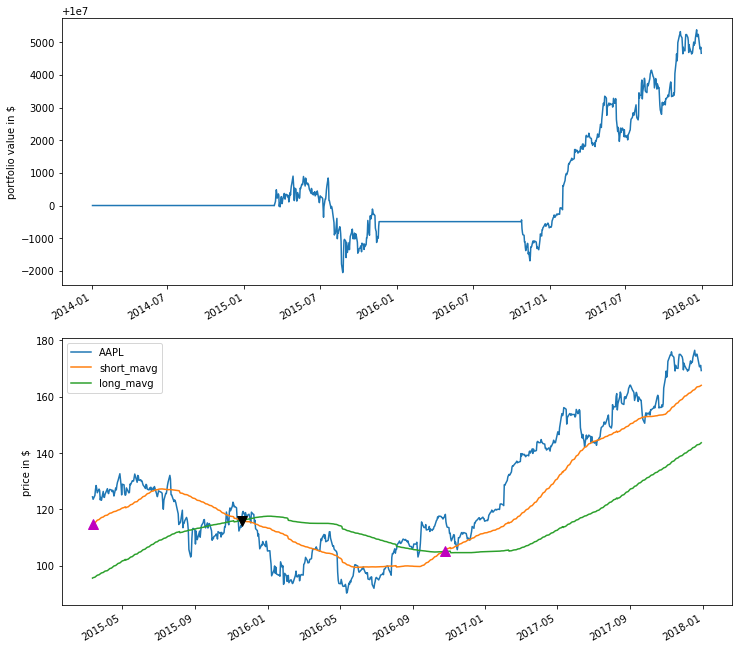

,period_open,period_close,starting_cash,orders,pnl,transactions,returns,short_exposure,ending_cash,ending_value,...,beta,period_label,sharpe,max_leverage,trading_days,algo_volatility,excess_return,AAPL,short_mavg,long_mavg
2014-01-02 21:00:00+00:00,2014-01-02 14:31:00+00:00,2014-01-02 21:00:00+00:00,1.000000e+07,[],0.0,[],0.000000e+00,0.0,1.000000e+07,0.0,...,None,2014-01,NaN,0.000000,1,NaN,0.0,NaN,NaN,NaN
2014-01-03 21:00:00+00:00,2014-01-03 14:31:00+00:00,2014-01-03 21:00:00+00:00,1.000000e+07,[],0.0,[],0.000000e+00,0.0,1.000000e+07,0.0,...,None,2014-01,NaN,0.000000,2,0.000000,0.0,NaN,NaN,NaN
2014-01-06 21:00:00+00:00,2014-01-06 14:31:00+00:00,2014-01-06 21:00:00+00:00,1.000000e+07,[],0.0,[],0.000000e+00,0.0,1.000000e+07,0.0,...,None,2014-01,NaN,0.000000,3,0.000000,0.0,NaN,NaN,NaN
2014-01-07 21:00:00+00:00,2014-01-07 14:31:00+00:00,2014-01-07 21:00:00+00:00,1.000000e+07,[],0.0,[],0.000000e+00,0.0,1.000000e+07,0.0,...,None,2014-01,NaN,0.000000,4,0.000000,0.0,NaN,NaN,NaN
2014-01-08 21:00:00+00:00,2014-01-08 14:31:00+00:00,2014-01-08 21:00:00+00:00,1.000000e+07,[],0.0,[],0.000000e+00,0.0,1.000000e+07,0.0,...,None,2014-01,NaN,0.000000,5,0.000000,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,9.987736e+06,[],0.0,[],0.000000e+00,0.0,9.987736e+06,17501.0,...,None,2017-12,0.687600,0.001763,1003,0.000191,0.0,175.01,163.442190,142.891860
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,9.987736e+06,[],-444.0,[],-4.437676e-05,0.0,9.987736e+06,17057.0,...,None,2017-12,0.624704,0.001763,1004,0.000193,0.0,170.57,163.598280,143.075387
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,9.987736e+06,[],3.0,[],2.998563e-07,0.0,9.987736e+06,17060.0,...,None,2017-12,0.624784,0.001763,1005,0.000192,0.0,170.60,163.746503,143.259273
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,9.987736e+06,[],48.0,[],4.797699e-06,0.0,9.987736e+06,17108.0,...,None,2017-12,0.630682,0.001763,1006,0.000192,0.0,171.08,163.899520,143.445907


In [27]:
%%zipline --start 2014-1-1 --end 2018-1-1 -o dma.pickle --no-benchmark


from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure(figsize=(12,12))

    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.loc[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.loc[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()